# Lab 2: More ggplot and dplyr

In [2]:
library(tidyverse)

In [4]:
rand_idx = runif(1000, min=1, max=dim(diamonds)[1])
dm = diamonds[rand_idx, ]
names(dm)
summary(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 32   D:128   SI1    :246   Min.   :54.60  
 1st Qu.:0.4000   Good     : 99   E:182   VS2    :219   1st Qu.:61.00  
 Median :0.7100   Very Good:205   F:170   SI2    :172   Median :61.80  
 Mean   :0.8023   Premium  :254   G:224   VS1    :147   Mean   :61.68  
 3rd Qu.:1.0500   Ideal    :410   H:151   VVS2   : 96   3rd Qu.:62.40  
 Max.   :4.1300                   I: 94   VVS1   : 80   Max.   :68.70  
                                  J: 51   (Other): 40                  
     table           price               x                y        
 Min.   :51.00   Min.   :  336.0   Min.   : 3.890   Min.   :3.920  
 1st Qu.:56.00   1st Qu.:  976.5   1st Qu.: 4.730   1st Qu.:4.750  
 Median :57.00   Median : 2458.0   Median : 5.710   Median :5.715  
 Mean   :57.57   Mean   : 3894.3   Mean   : 5.748   Mean   :5.747  
 3rd Qu.:59.00   3rd Qu.: 5293.0   3rd Qu.: 6.553   3rd Qu.:6.560  
 Max.   :68.00  

# ggplot

![Caption for the picture.](./graph1.png)

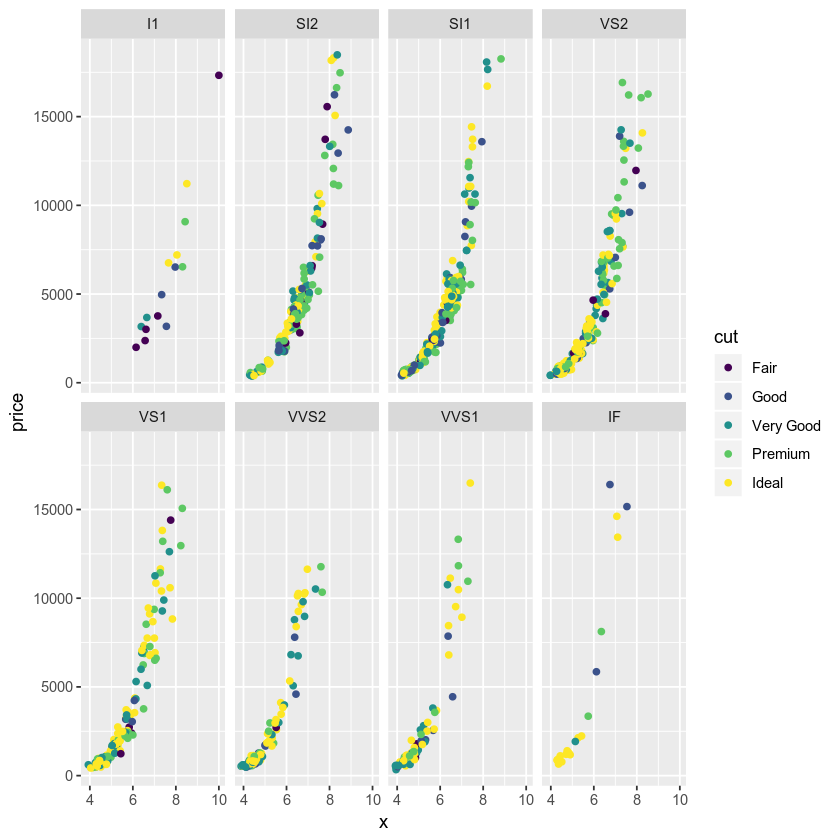

In [11]:
p1 = ggplot(dm) + 
    geom_point(aes(x, price, color = cut)) + 
    facet_wrap(vars(clarity), ncol=4)
print(p1)

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

![Caption for the picture.](./graph2.png)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


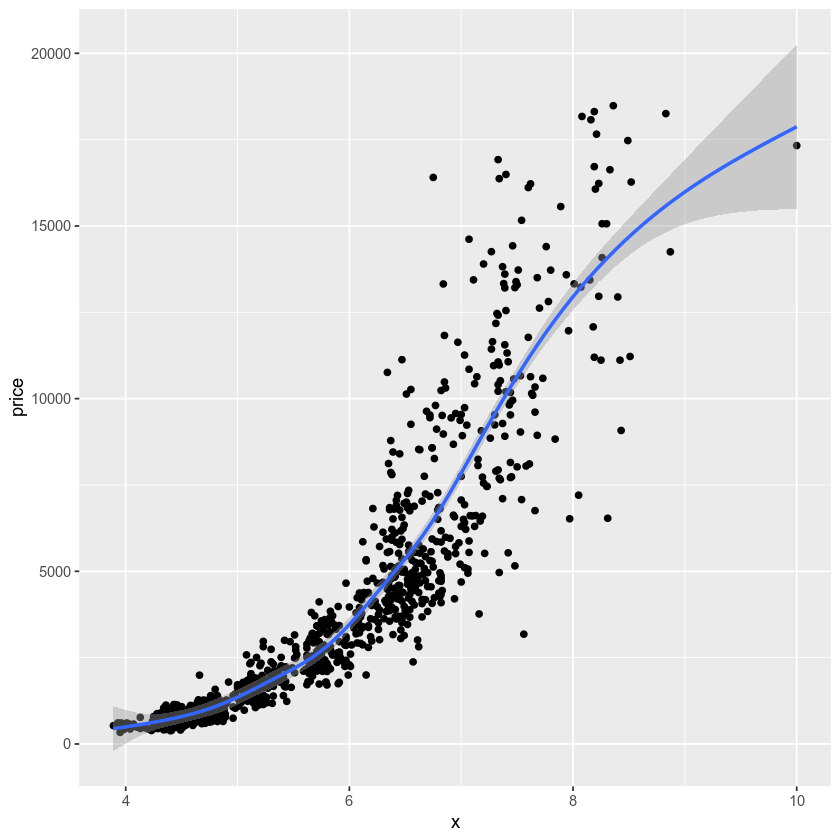

In [16]:
p2 = ggplot(dm, aes(x, price)) +
    geom_point() +
    geom_smooth()
print(p2)

### Exercise:
1. In the above fit, use locally weighted scatterplot smoother instead general additive model.
2. Make separate files for each category of the clarity variable for the plot above.
3. How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

![Caption for the picture.](./graph3.png)

In [27]:
p3 = ggplot() + 
    geom_point() + 
    geom_smooth()

### 3.6.1 Exercise
1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predicions.


![Caption for the picture.](./graph4.png)

In [28]:
p4 = ggplot() + 
    geom_point() + 
    geom_smooth()

1. What does show.legend=FALSE do? What happens if you remove this?
2. What does the se argument in geom_smooth do?
3. Will these two graphs look different? Why / why not?

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


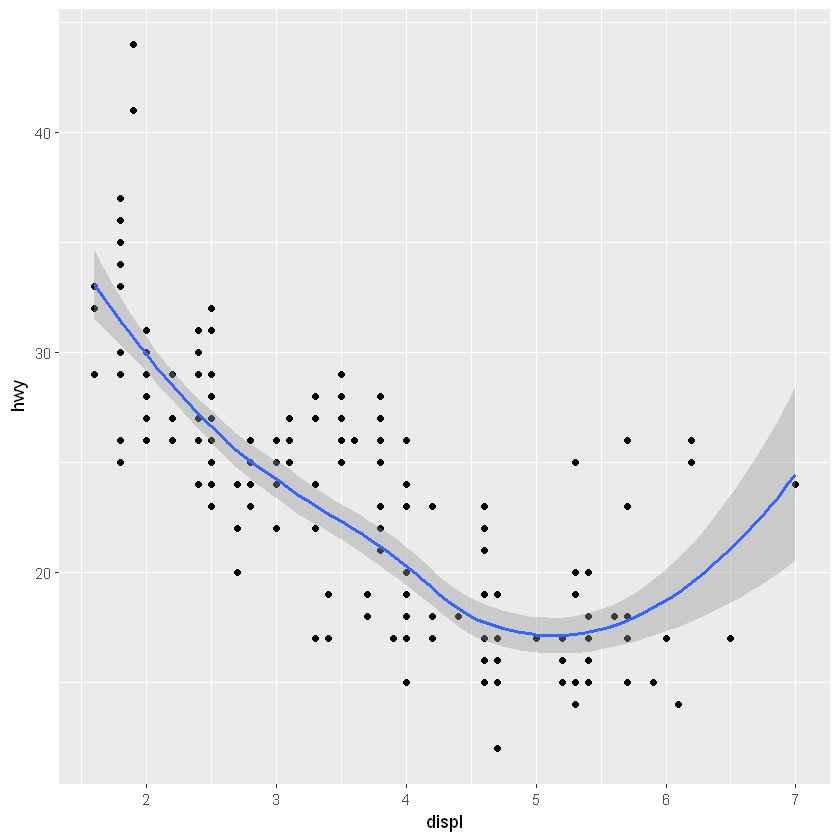

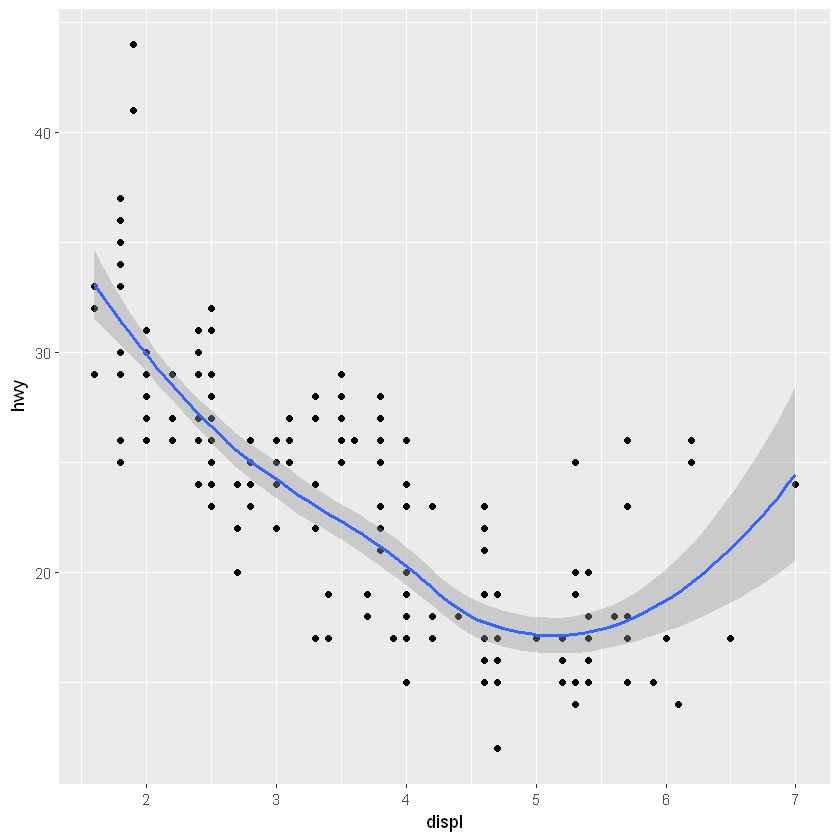

In [29]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
    geom_point() +
    geom_smooth()

ggplot() + 
    geom_point(data=mpg, mapping = aes(x=displ, y=hwy)) +
    geom_smooth(data=mpg, mapping = aes(x=displ, y=hwy))

## Statistical transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().

stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [30]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

![Caption for the picture.](./graph5.png)

In [31]:
ggplot() +
  geom_bar() + 
  ggtitle()

ERROR: Error in labs(title = label, subtitle = subtitle): argument "label" is missing, with no default


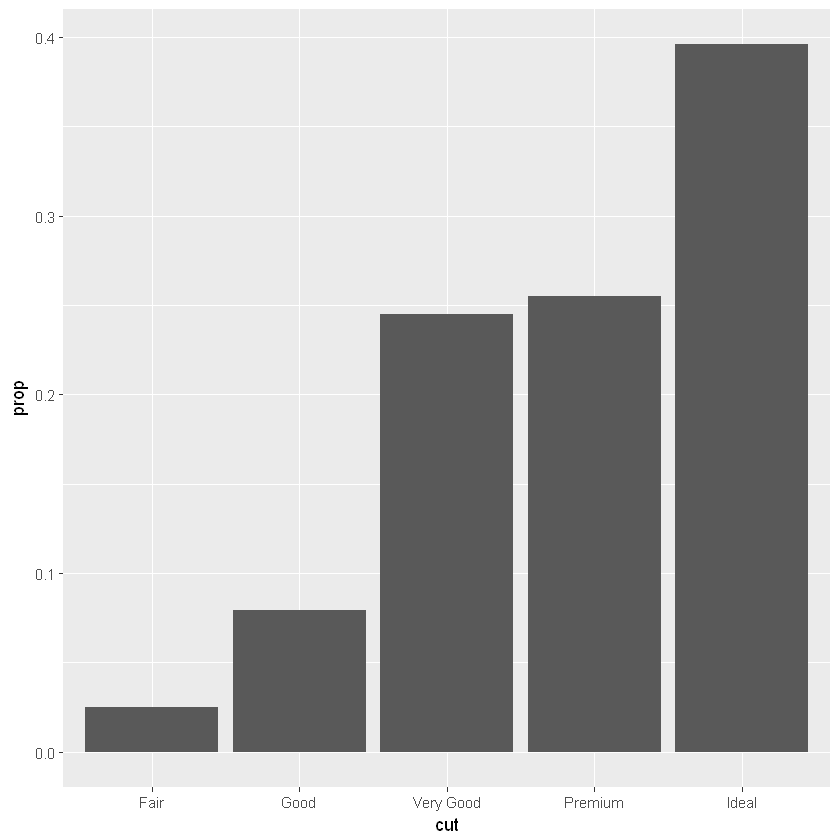

In [32]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group=1))

Other times, you want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary() which summarises the y values for each unique x value, to draw attention to the summary that you're computing:

![Caption for the picture.](graph6.png)

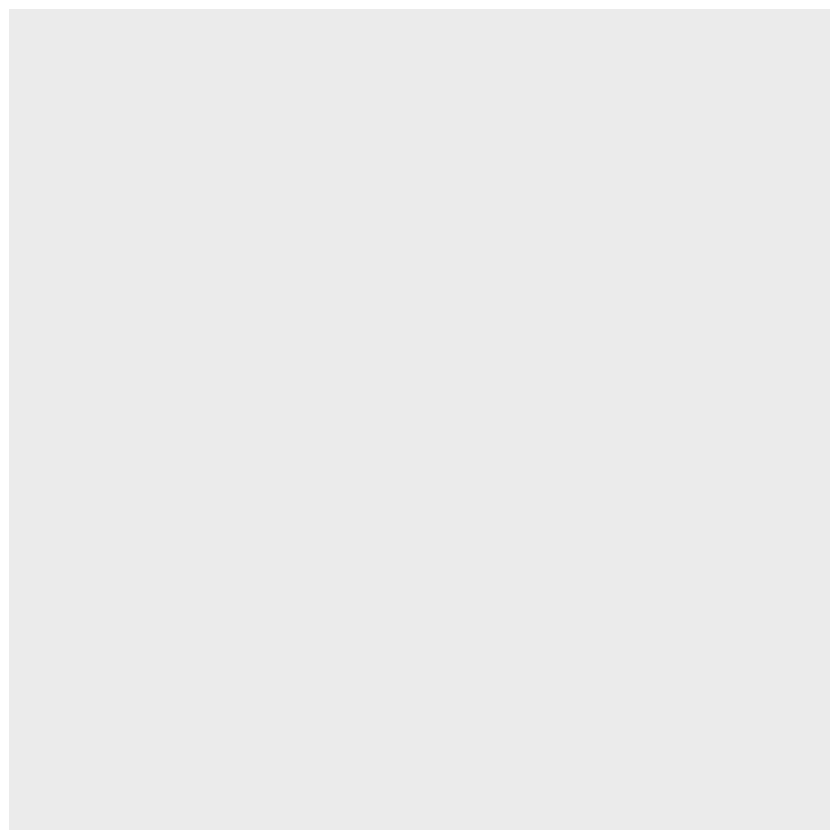

In [37]:
ggplot() + 
    stat_summary()

### Exercise
1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?
2. What does geom_col() do? How is it different to geom_bar()?
3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
4. What variables does stat_smooth() compute? What parameters control its behaviour?
6. In our proportion bar chart, we need to set group = 1. Why? In other words, what is the problem with these two graphs?

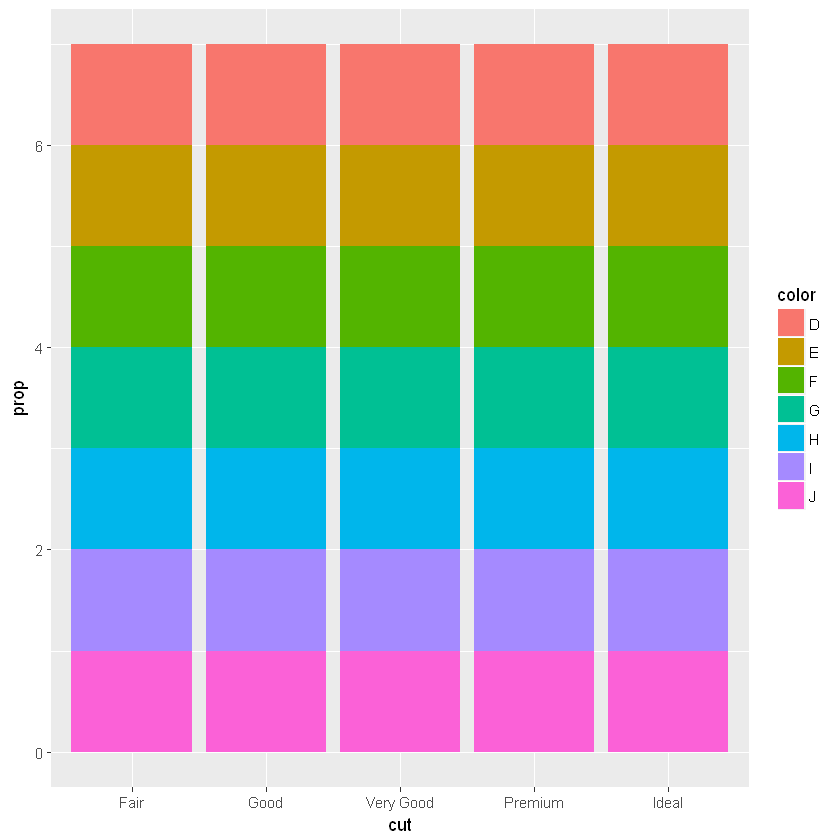

In [38]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))

## Position adjustments

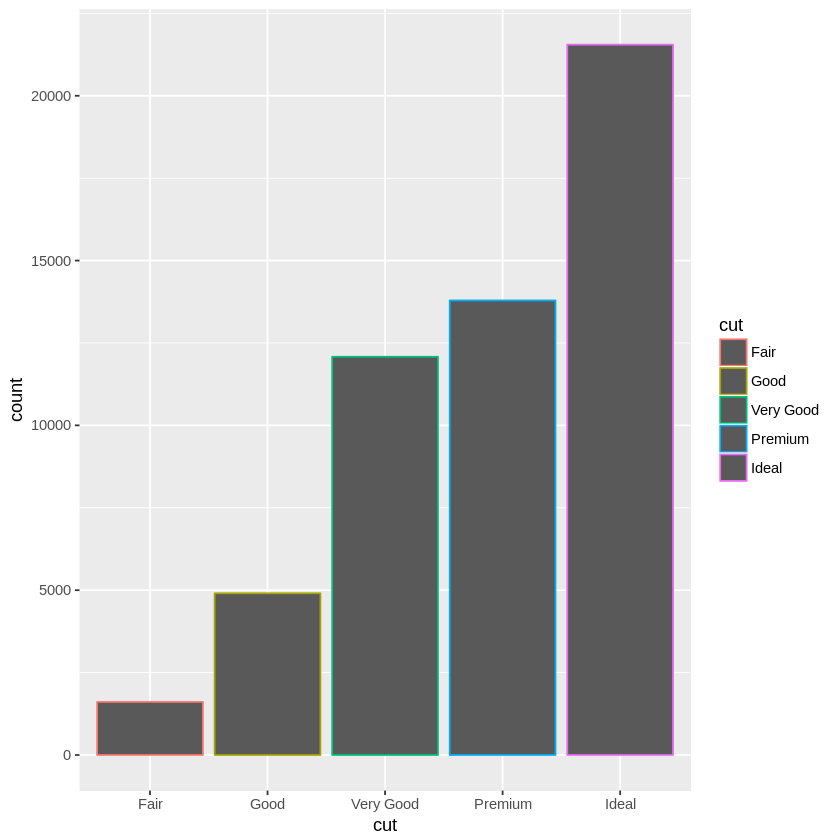

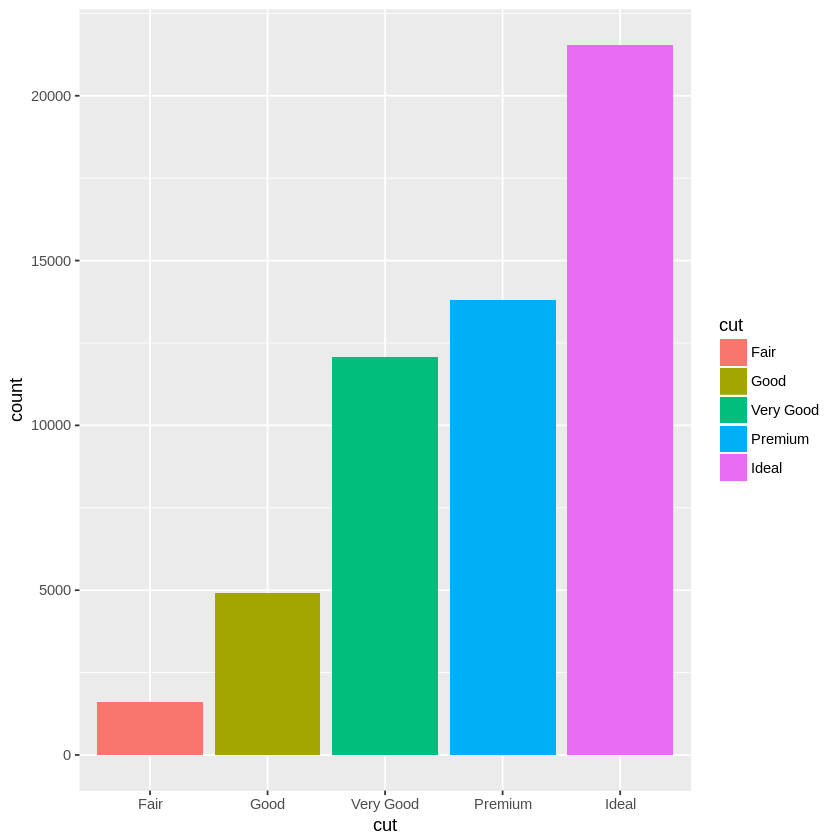

In [24]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](graph7.png)

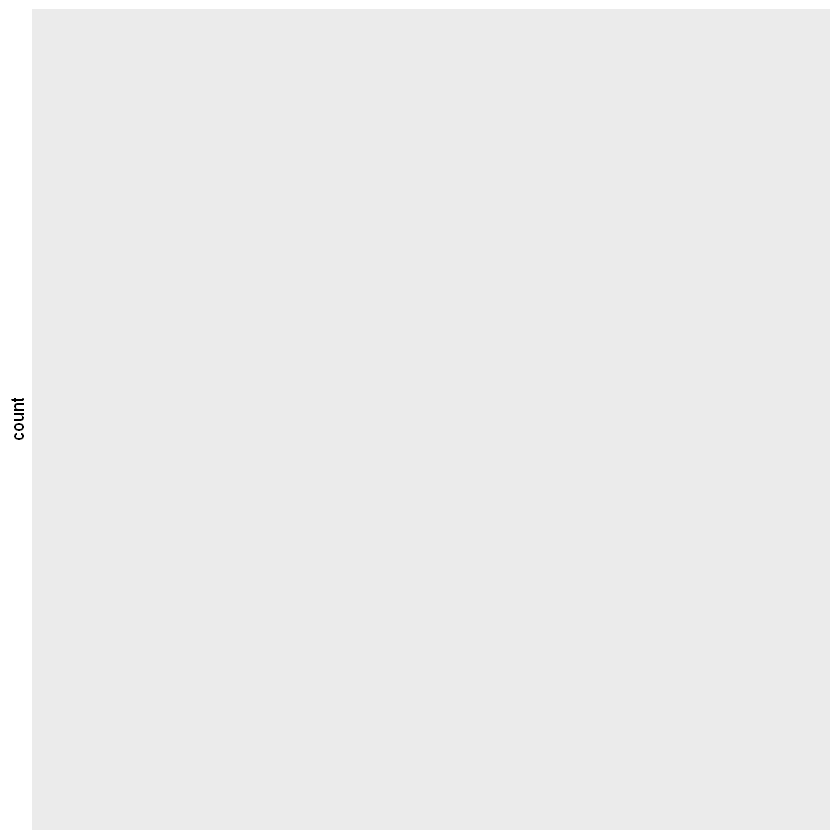

In [41]:
ggplot() + 
  geom_bar() # this "fill" is different from the following one.

*position = "identity"*
This will place each object exactly where it falls in the context of the graph. This is not very useful for bars, because it overlaps them. To see that overlapping we either need to make the bars slightly transparent by setting alpha to a small value, or completely transparent by fill=NA

![Caption for the picture.](graph8.png)

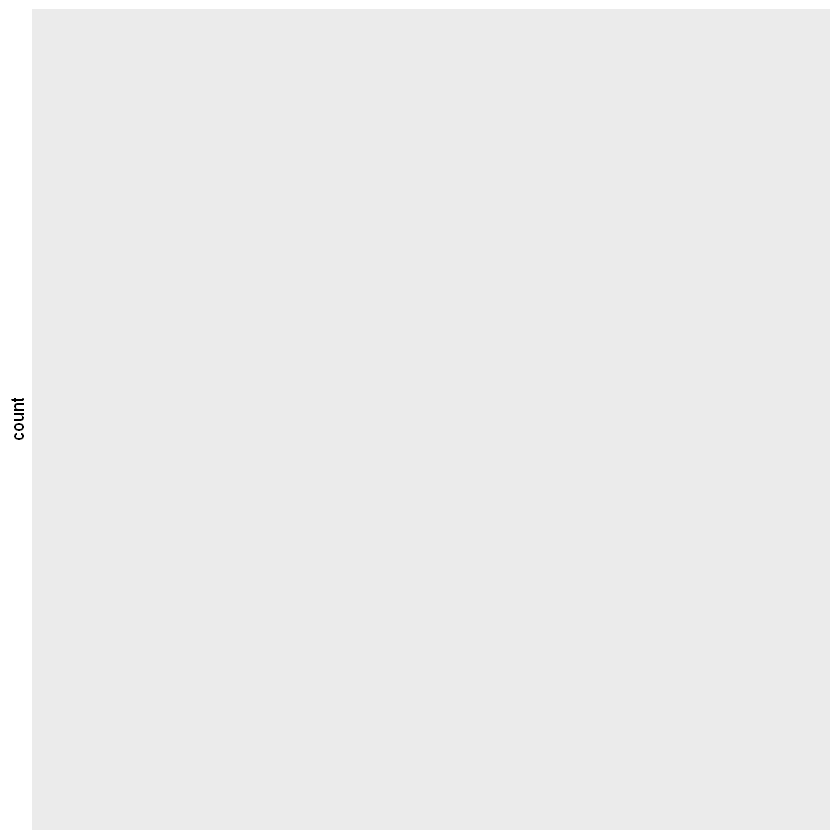

In [43]:
ggplot() + 
  geom_bar()

![Caption for the picture.](graph9.png)

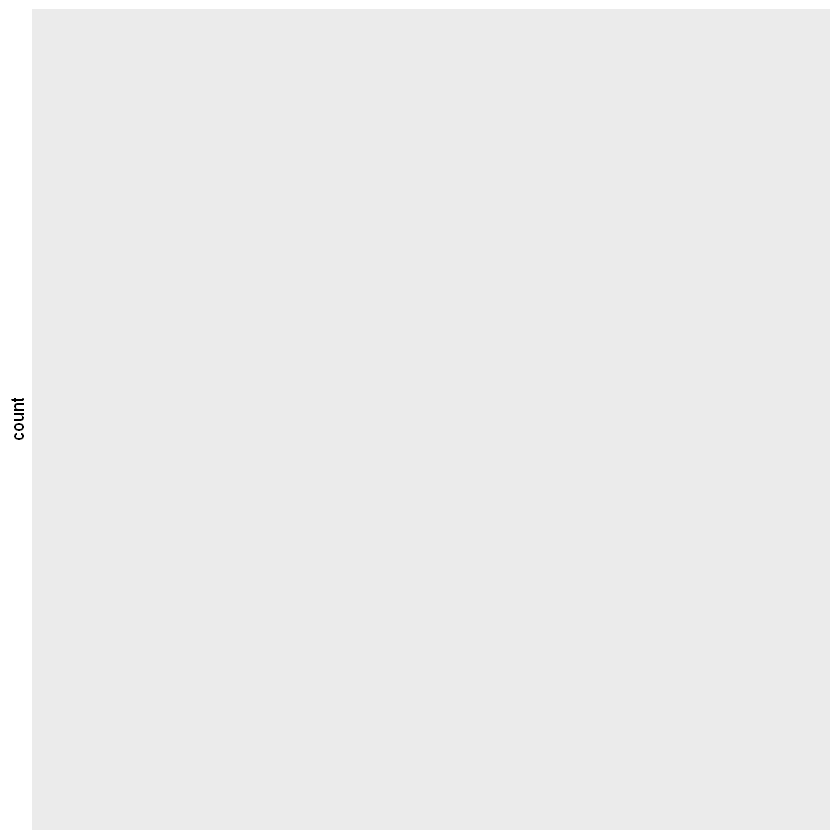

In [44]:
ggplot() + 
  geom_bar()

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

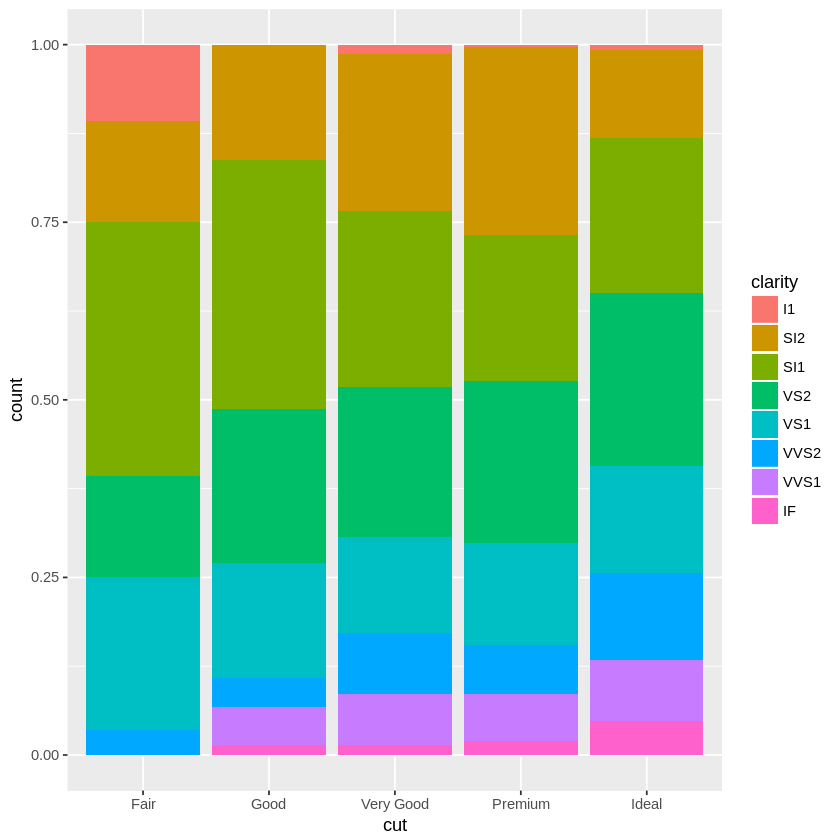

In [27]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](graph10.png)

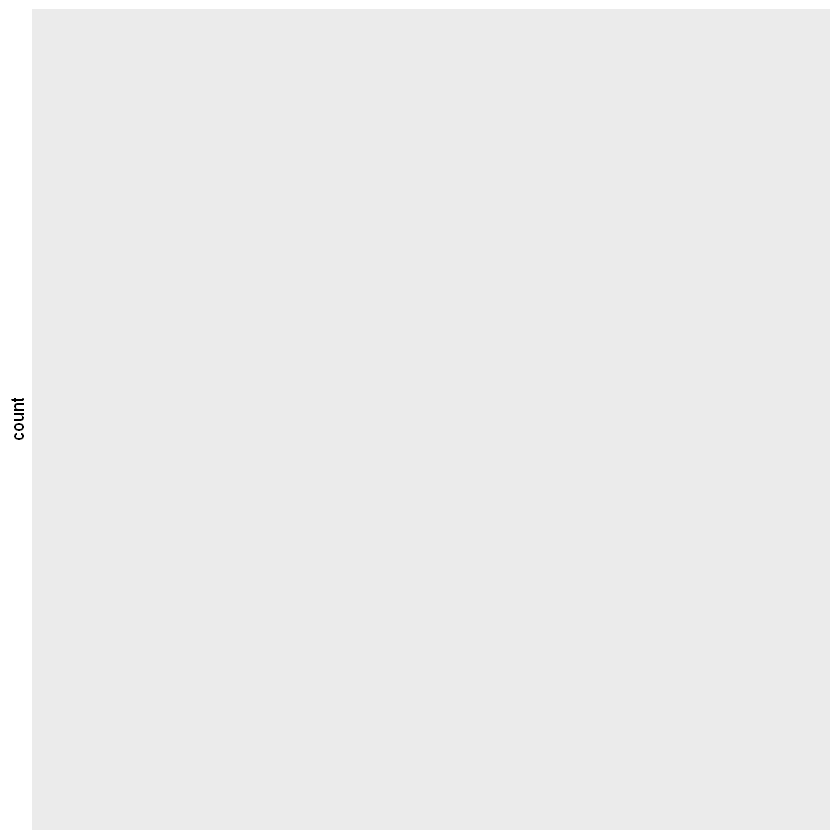

In [45]:
ggplot() + 
  geom_bar()

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

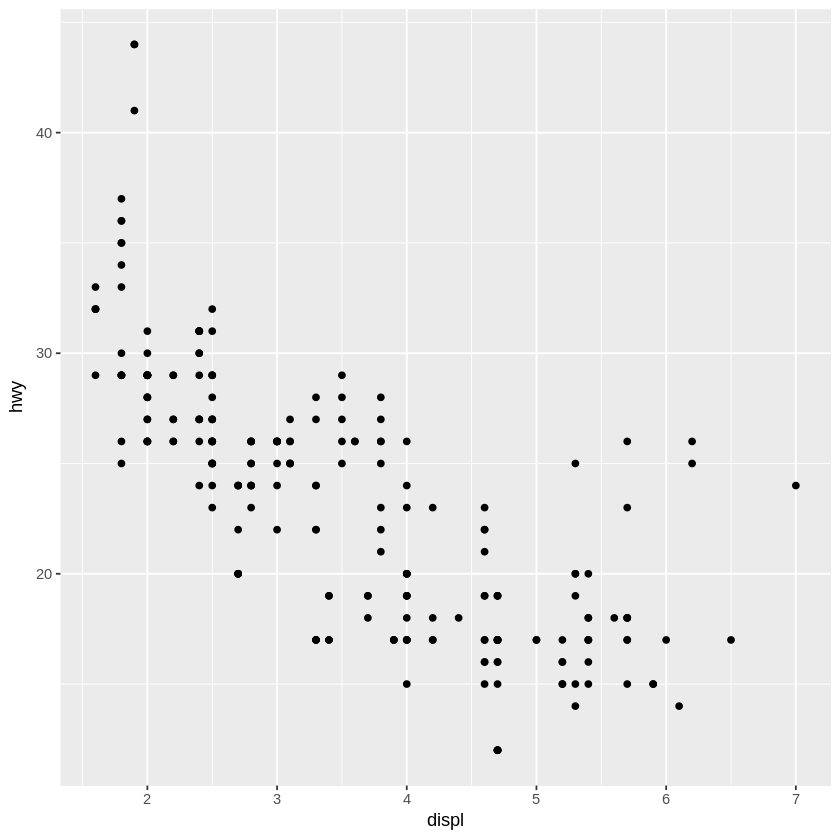

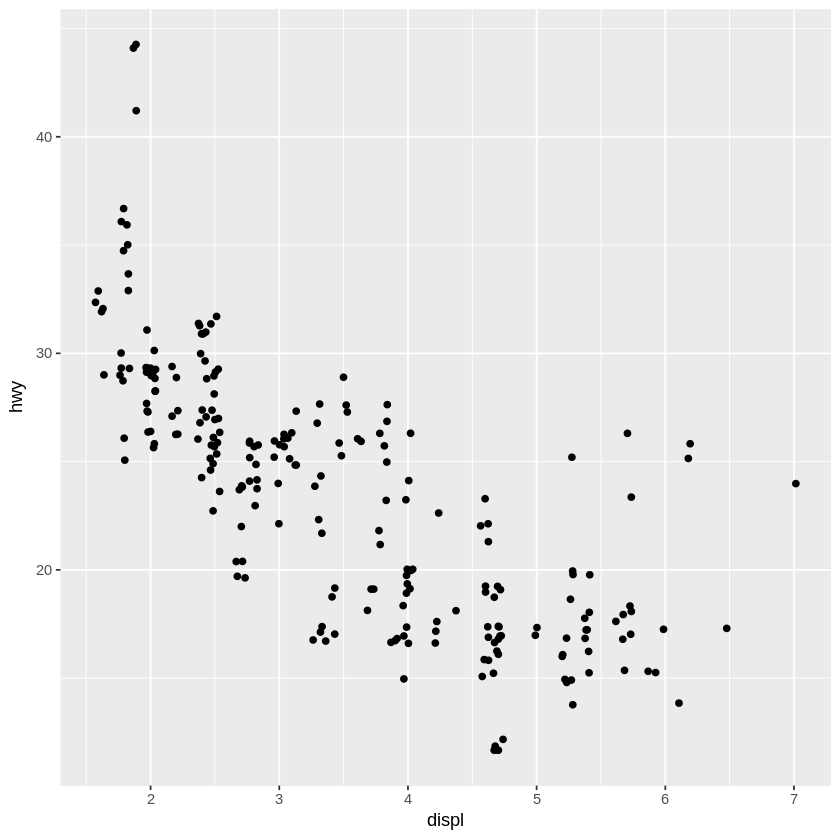

In [29]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

## Jitter Question
1. What is the problem with this plot? How could you improve it?

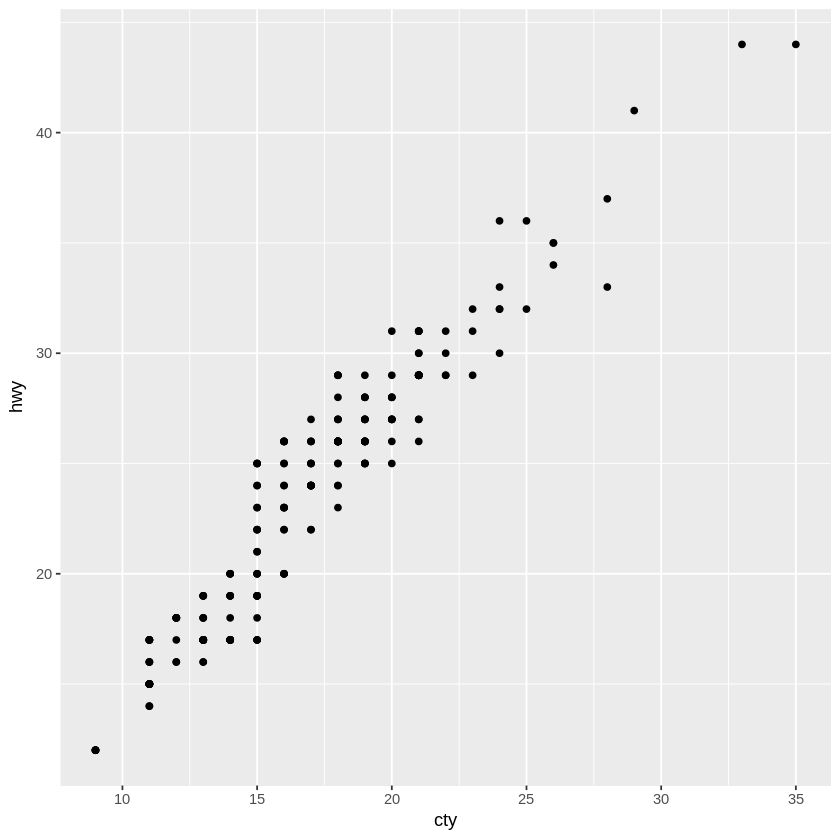

In [30]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

### Exercise
1. What parameters to geom_jitter() control the amount of jittering?
2. Compare and contrast geom_jitter() with geom_count().
3. What's the default position adjustment from geom_boxplot()? Create a visualization of the mpg dataset and demostrate it. 
Make sure you go through coordinate systems.

# dplyr for data manipulation

In [33]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
0.33,Ideal,F,VS2,62.1,55,666,4.45,4.47,2.77
2.10,Fair,G,I1,64.6,58,6597,8.05,8.01,5.19
0.54,Ideal,E,VVS2,62.2,54,2616,5.23,5.26,3.26
1.26,Premium,F,SI2,61.3,58,6657,6.99,6.91,4.26
0.30,Ideal,D,SI2,62.0,56,426,4.31,4.34,2.68
0.32,Ideal,D,VVS1,61.8,56,910,4.37,4.40,2.71


Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [34]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [35]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
sizes

[1] "M"   "S"   "S"   "M"   "XL"  "XXL" "XL"  "S"   "M"   "L"

In [36]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes) # in R Studio, this will output the ordering explicitly with less-than signs

[1] "S"   "M"   "L"   "XL"  "XXL"

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [37]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
0.74,Fair,J,VS1,58.8,68,1982,5.91,5.8,3.44


Usually you want to store the newly subsetted data in memory. 

In [38]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [39]:
4 == 6
test = 6
test
test == 5


[1] FALSE

[1] 6

[1] FALSE

## Use cases

In [47]:
a = filter(dm, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter() 
# filtering for rows that satisfy both conditions

c = filter() 
# filtering for rows that satisfy exactly one condition

best_cuts = filter() 
# filtering using membership condition

not_worst_cuts = filter() 
# can do this because cut is an ordinal variable

ERROR: Error in filter_(.data, .dots = compat_as_lazy_dots(...)): argument ".data" is missing, with no default


In [41]:
not_worst_cuts[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
0.33,Ideal,F,VS2,62.1,55,666,4.45,4.47,2.77
0.54,Ideal,E,VVS2,62.2,54,2616,5.23,5.26,3.26
1.26,Premium,F,SI2,61.3,58,6657,6.99,6.91,4.26
0.30,Ideal,D,SI2,62.0,56,426,4.31,4.34,2.68
0.32,Ideal,D,VVS1,61.8,56,910,4.37,4.40,2.71
1.02,Premium,D,SI2,59.7,60,5198,6.58,6.55,3.92
0.24,Very Good,E,VVS2,60.0,57,552,4.07,4.10,2.45
0.51,Ideal,E,VS2,62.2,57,1656,5.08,5.11,3.17
1.02,Very Good,E,SI1,63.7,55,7277,6.29,6.40,4.04
0.83,Premium,J,SI2,59.1,60,2241,6.13,6.12,3.62


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [44]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [49]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [50]:
filter(df, x>1)

x
3


In [52]:
filter(df, is.na(x) | x > 1)

x
NA
3


### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [53]:
arrange(dm, cut, color)[1:20,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
0.50,Fair,D,SI1,64.6,61,1238,5.05,4.95,3.23
0.70,Fair,D,SI1,66.0,56,2093,5.45,5.52,3.62
1.50,Fair,D,I1,64.7,62,5460,7.19,7.04,4.60
0.50,Fair,E,VS2,79.0,73,2579,5.21,5.18,4.09
0.50,Fair,E,SI1,65.3,58,1134,4.99,4.91,3.23
0.50,Fair,E,SI2,58.0,67,851,5.26,5.17,3.02
0.70,Fair,E,VS2,65.6,61,2352,5.62,5.47,3.64
0.98,Fair,F,SI1,61.8,66,3622,6.38,6.27,3.91
0.75,Fair,F,VS1,55.8,70,2859,6.09,5.98,3.37
0.33,Fair,F,VVS2,65.7,54,693,4.37,4.30,2.85


In [48]:
# arranging in the descending order of carat and then cut
arrange()[1:20,]

ERROR: Error in arrange_(.data, .dots = compat_as_lazy_dots(...)): argument ".data" is missing, with no default


Missing values are always sorted at the end:

In [49]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
2
5
NA


In [50]:
arrange(df, desc(x))

x
5
2
NA


### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [57]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [58]:
select(dm, carat, price)[1:20,]

carat,price
0.33,666
2.10,6597
0.54,2616
1.26,6657
0.30,426
0.32,910
1.02,5198
0.24,552
0.51,1656
1.02,7277


In [59]:
select(dm, carat:price)[1:20,]

carat,cut,color,clarity,depth,table,price
0.33,Ideal,F,VS2,62.1,55,666
2.10,Fair,G,I1,64.6,58,6597
0.54,Ideal,E,VVS2,62.2,54,2616
1.26,Premium,F,SI2,61.3,58,6657
0.30,Ideal,D,SI2,62.0,56,426
0.32,Ideal,D,VVS1,61.8,56,910
1.02,Premium,D,SI2,59.7,60,5198
0.24,Very Good,E,VVS2,60.0,57,552
0.51,Ideal,E,VS2,62.2,57,1656
1.02,Very Good,E,SI1,63.7,55,7277


In [60]:
select(dm, -(carat:price))[1:20,]

x,y,z
4.45,4.47,2.77
8.05,8.01,5.19
5.23,5.26,3.26
6.99,6.91,4.26
4.31,4.34,2.68
4.37,4.40,2.71
6.58,6.55,3.92
4.07,4.10,2.45
5.08,5.11,3.17
6.29,6.40,4.04


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [61]:
rename(dm, width=x)[1:20,]

carat,cut,color,clarity,depth,table,price,width,y,z
0.33,Ideal,F,VS2,62.1,55,666,4.45,4.47,2.77
2.10,Fair,G,I1,64.6,58,6597,8.05,8.01,5.19
0.54,Ideal,E,VVS2,62.2,54,2616,5.23,5.26,3.26
1.26,Premium,F,SI2,61.3,58,6657,6.99,6.91,4.26
0.30,Ideal,D,SI2,62.0,56,426,4.31,4.34,2.68
0.32,Ideal,D,VVS1,61.8,56,910,4.37,4.40,2.71
1.02,Premium,D,SI2,59.7,60,5198,6.58,6.55,3.92
0.24,Very Good,E,VVS2,60.0,57,552,4.07,4.10,2.45
0.51,Ideal,E,VS2,62.2,57,1656,5.08,5.11,3.17
1.02,Very Good,E,SI1,63.7,55,7277,6.29,6.40,4.04


In [62]:
select(dm, width = x)[1:20,]

width
4.45
8.05
5.23
6.99
4.31
4.37
6.58
4.07
5.08
6.29


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [64]:
select(dm, price, carat, everything())[1:20,]

price,carat,cut,color,clarity,depth,table,x,y,z
666,0.33,Ideal,F,VS2,62.1,55,4.45,4.47,2.77
6597,2.10,Fair,G,I1,64.6,58,8.05,8.01,5.19
2616,0.54,Ideal,E,VVS2,62.2,54,5.23,5.26,3.26
6657,1.26,Premium,F,SI2,61.3,58,6.99,6.91,4.26
426,0.30,Ideal,D,SI2,62.0,56,4.31,4.34,2.68
910,0.32,Ideal,D,VVS1,61.8,56,4.37,4.40,2.71
5198,1.02,Premium,D,SI2,59.7,60,6.58,6.55,3.92
552,0.24,Very Good,E,VVS2,60.0,57,4.07,4.10,2.45
1656,0.51,Ideal,E,VS2,62.2,57,5.08,5.11,3.17
7277,1.02,Very Good,E,SI1,63.7,55,6.29,6.40,4.04


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
1. Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

### Mutate
to create a computed column

In [65]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:20,]

x,y,z,volume
4.45,4.47,2.77,55.09945
8.05,8.01,5.19,334.65380
5.23,5.26,3.26,89.68195
6.99,6.91,4.26,205.76183
4.31,4.34,2.68,50.13047
4.37,4.40,2.71,52.10788
6.58,6.55,3.92,168.94808
4.07,4.10,2.45,40.88315
5.08,5.11,3.17,82.28940
6.29,6.40,4.04,162.63424


If you only want to keep the new variables, use transmute()

In [66]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:20,]

volume
55.09945
334.65380
89.68195
205.76183
50.13047
52.10788
168.94808
40.88315
82.28940
162.63424


Read Section 5.5.1 in the book for some specific functions.

### Exercise
1. Add a new column that converts the US dollar prices to Korean Won amounts and rounds to the nearest integer. Then order the columns as [carat, WON price, price, ...] where '...' stands for everything else. Today's exchange rate is USD = 1070 WON

## Summarise
Generally used in concert with group_by() function to output summaries by group. Group summaries are seen in many applications

In [69]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

color,avg_price
D,2727.400
E,3319.500
F,3351.632
G,4097.361
H,4394.646
I,4579.943
J,5561.892


In [70]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [71]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans)))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [72]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
honda,1999,5,31.60000,24.80000
honda,2008,4,33.75000,24.00000


In [73]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


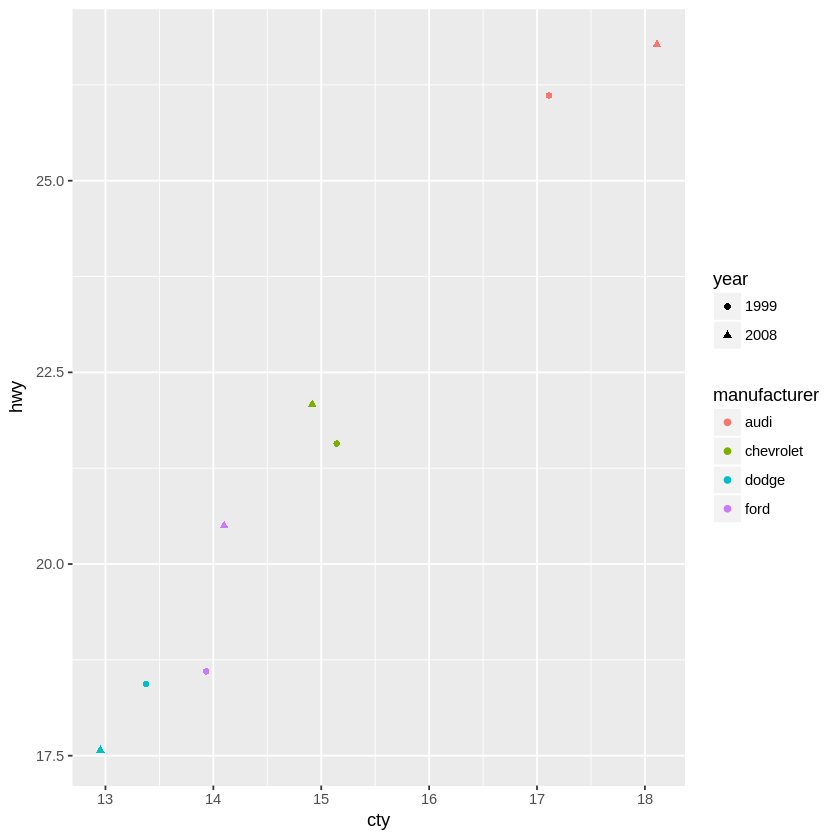

In [74]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [75]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

In [76]:
hwy_summary_ag2

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
